In [5]:
import pandas as pd 
import seaborn as sns

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
# Missing Values Data Frame: Train 
missing = train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/train.shape[0] * 100
train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
train_missing.sort_values(['missing percent'], ascending = [False])


,total,missing percent
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945
GarageQual,81.0,5.547945


In [61]:
# Missing Values Data Frame: Test
missing_test = test.isna().sum()
missing_test = missing_test[missing_test>0]
missingtest_percent = missing_test/test.shape[0] * 100
test_missing = pd.DataFrame([missing_test, missingtest_percent], index = ['total', 'missing percent']).T
test_missing.sort_values(['missing percent'], ascending = [False])


,total,missing percent
PoolQC,1456.0,99.794380
MiscFeature,1408.0,96.504455
Alley,1352.0,92.666210
Fence,1169.0,80.123372
FireplaceQu,730.0,50.034270
LotFrontage,227.0,15.558602
GarageCond,78.0,5.346127
GarageYrBlt,78.0,5.346127
GarageQual,78.0,5.346127
GarageFinish,78.0,5.346127


In [62]:
train = train.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'PoolArea', 'Id'])

In [63]:
#Numerical Variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train  = train.select_dtypes(include = numerics)  
numeric_train = numeric_train.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','GarageYrBlt', 'MoSold', 'YrSold', 'YearRemodAdd', 'OverallQual',
                                             'OverallCond', 'YearBuilt','MSSubClass'])
numeric_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,250000


In [64]:
# Factor Variables
factors = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
train_factors = train[factors]
train_factors.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,7,5,2003,2003,2003.0,2,2008
1,20,6,8,1976,1976,1976.0,5,2007
2,60,7,5,2001,2002,2001.0,9,2008
3,70,7,5,1915,1970,1998.0,2,2006
4,60,8,5,2000,2000,2000.0,12,2008


In [75]:
# Categorical Variables: Turned into Dummies by Owner
categories = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
train_categories = train[categories]
train_categories.head()

# Categorical Variables 
categori = ['object']
catego = train.select_dtypes(include= categori)
catego.head()
categorical_train = pd.concat([catego, train_categories], axis=1, sort=False)

categorical_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,1,0,2,1
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,RFn,TA,TA,Y,WD,Normal,0,1,2,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,1,0,2,1
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,TA,TA,Y,WD,Abnorml,1,0,1,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,1,0,2,1


In [66]:
# Graphing Numeric Variables
numeric_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

In [85]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    numeric_train.SalePrice.skew(), numeric_train.SalePrice.kurtosis()))

Skew: 1.883 | Kurtosis: 6.536


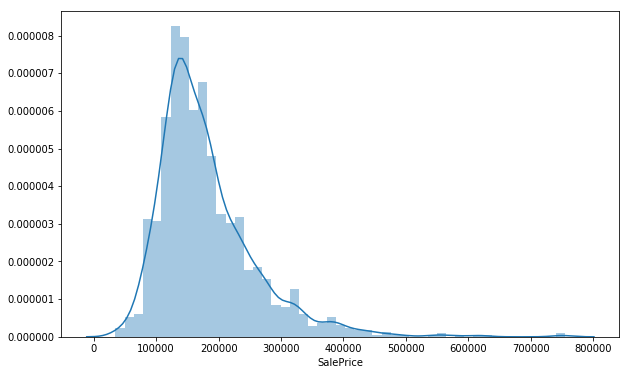

In [86]:
# Looking at Target Variable: Sale Price
plt.figure(figsize=(10,6))
sns.distplot(numeric_train.SalePrice)
plt.show()

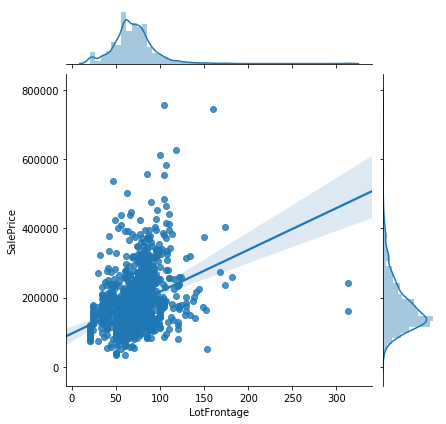

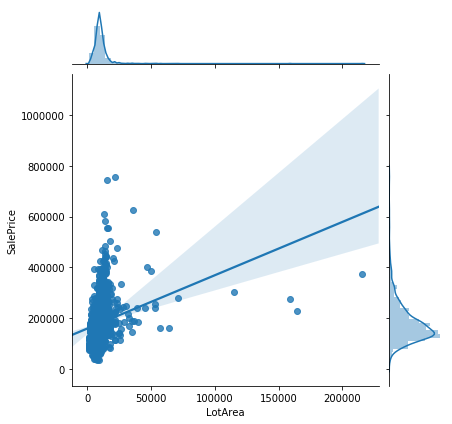

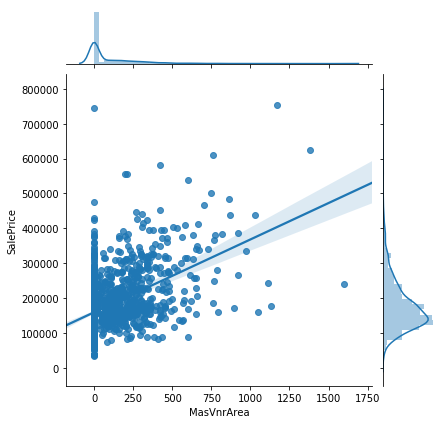

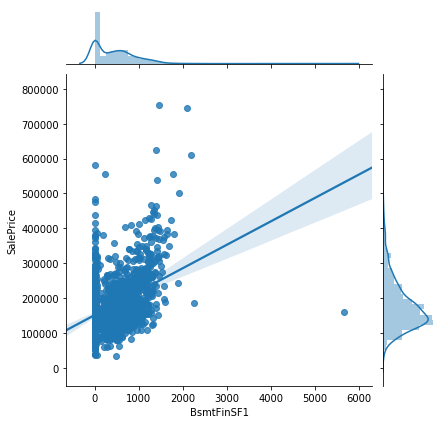

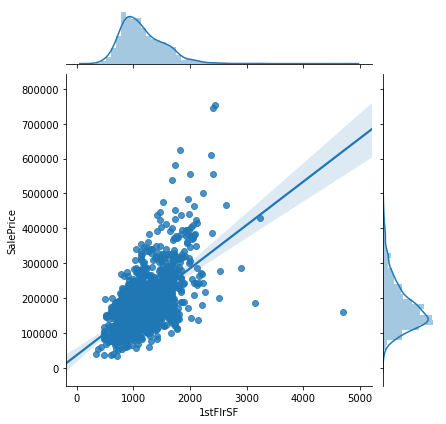

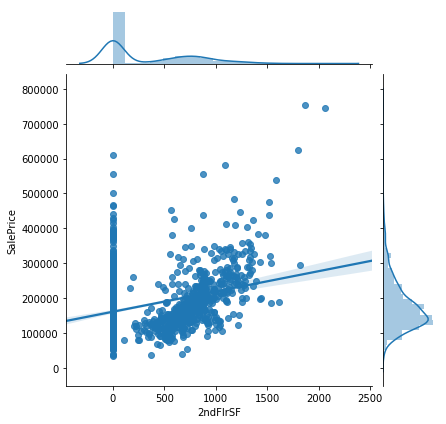

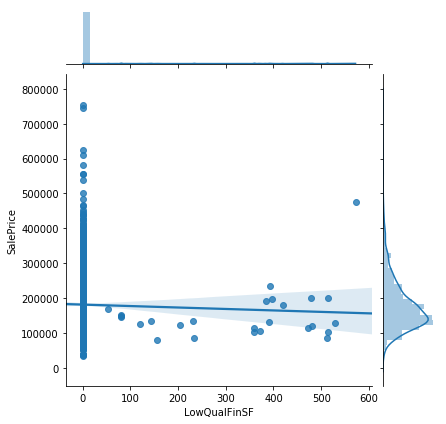

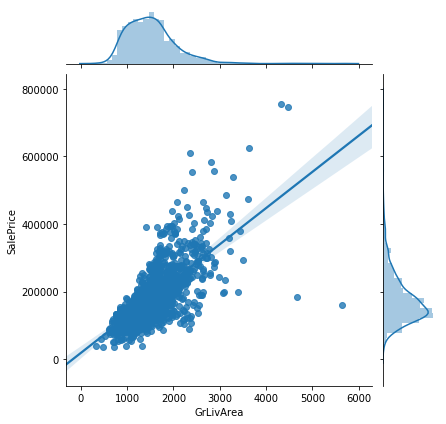

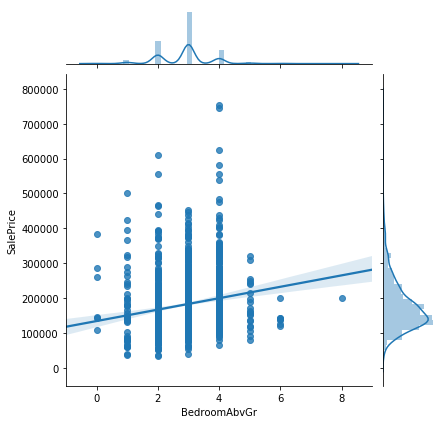

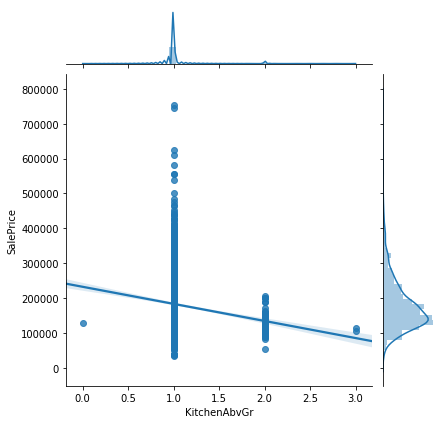

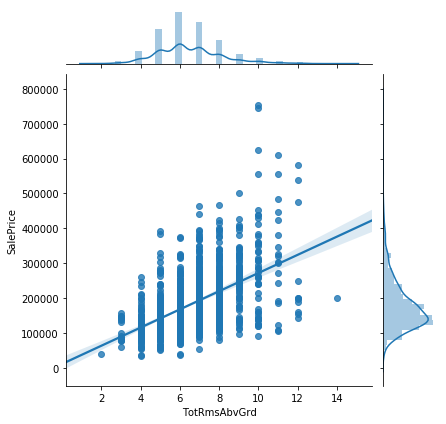

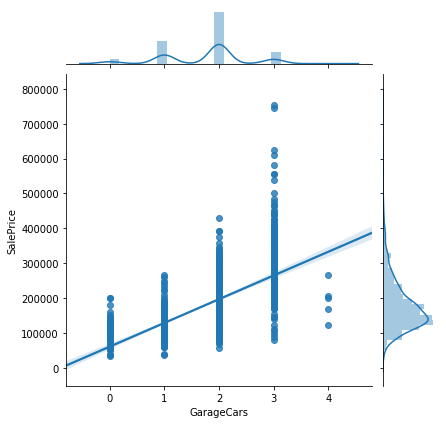

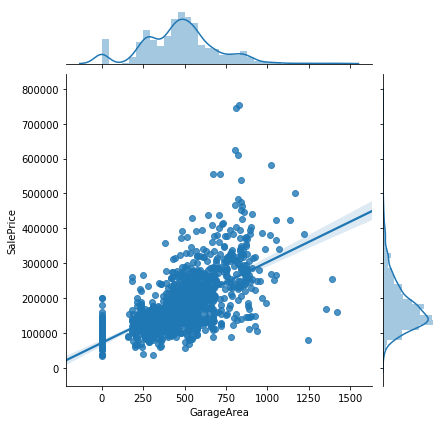

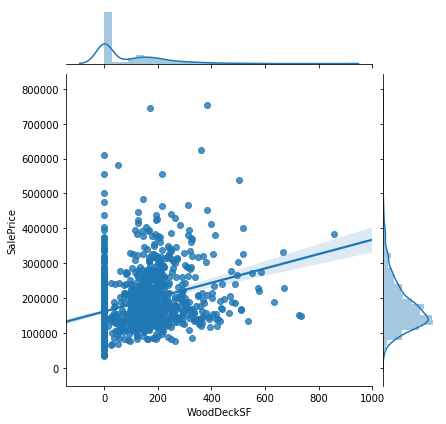

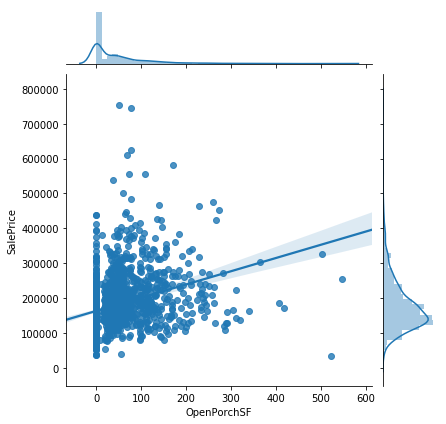

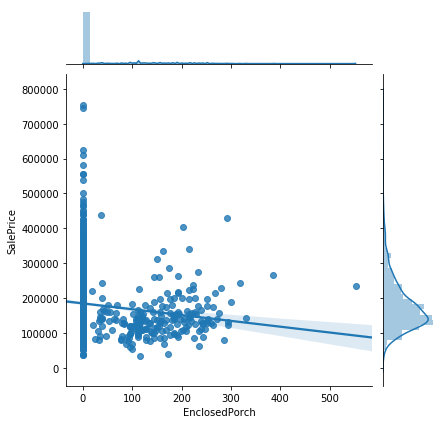

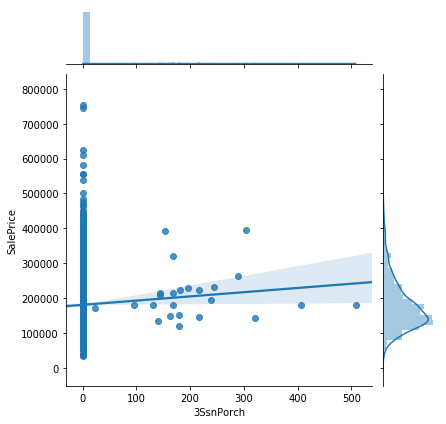

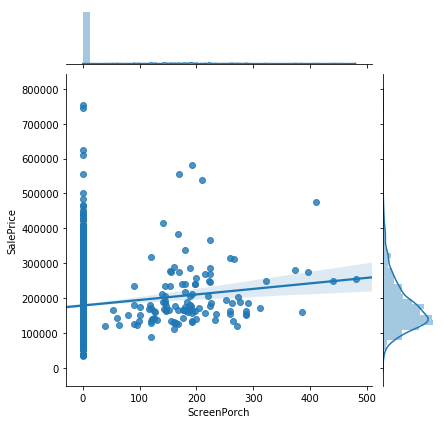

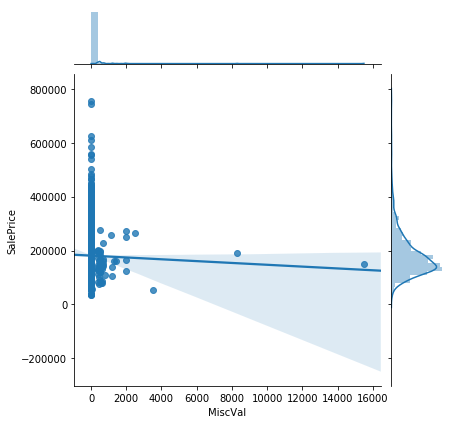

In [67]:
# Here is a scatter plot with dist plot for all numeric variables in the train data 
#by Sale Price

sns.jointplot(x="LotFrontage", y="SalePrice", data=numeric_train, kind = 'reg')

sns.jointplot(x="LotArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="MasVnrArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="BsmtFinSF1", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="1stFlrSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="2ndFlrSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x='LowQualFinSF', y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GrLivArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="BedroomAbvGr", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="KitchenAbvGr", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="TotRmsAbvGrd", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GarageCars", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GarageArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="WoodDeckSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="OpenPorchSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="EnclosedPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="3SsnPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="ScreenPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="MiscVal", y="SalePrice", data=numeric_train, kind = 'reg')

/Users/drucila/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


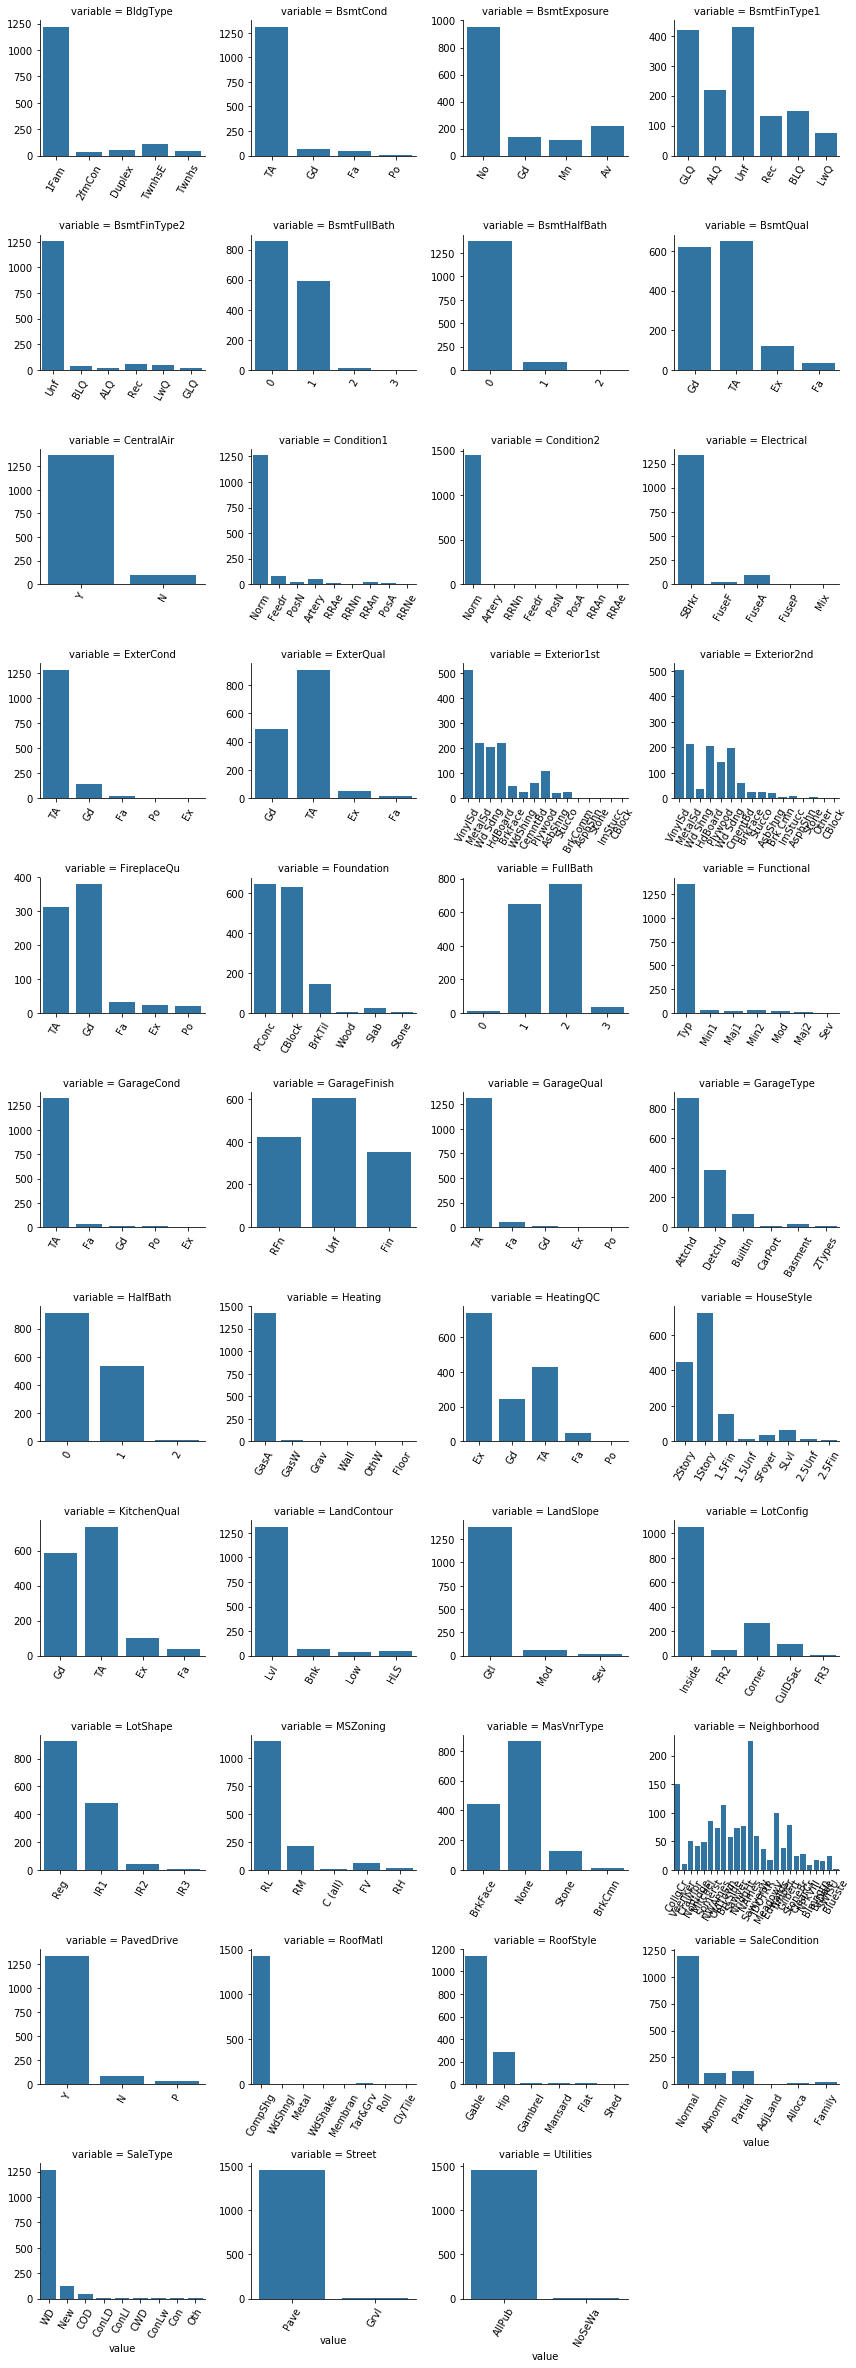

In [78]:
# Categorical Variables
categorical_train.columns
f = pd.melt(categorical_train, value_vars=sorted(categorical_train))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [82]:
categorical_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath'],
      dtype='object')

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


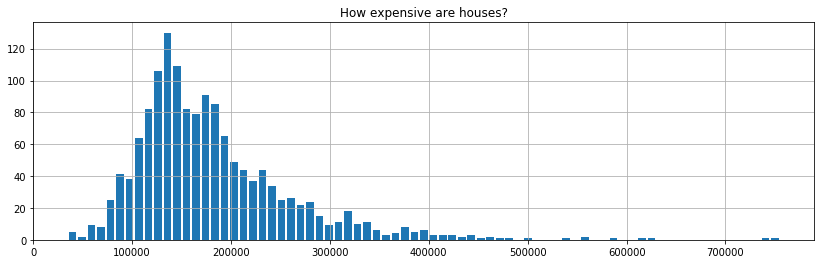

In [68]:
# How expensive are houses?
import matplotlib.pyplot as plt
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()


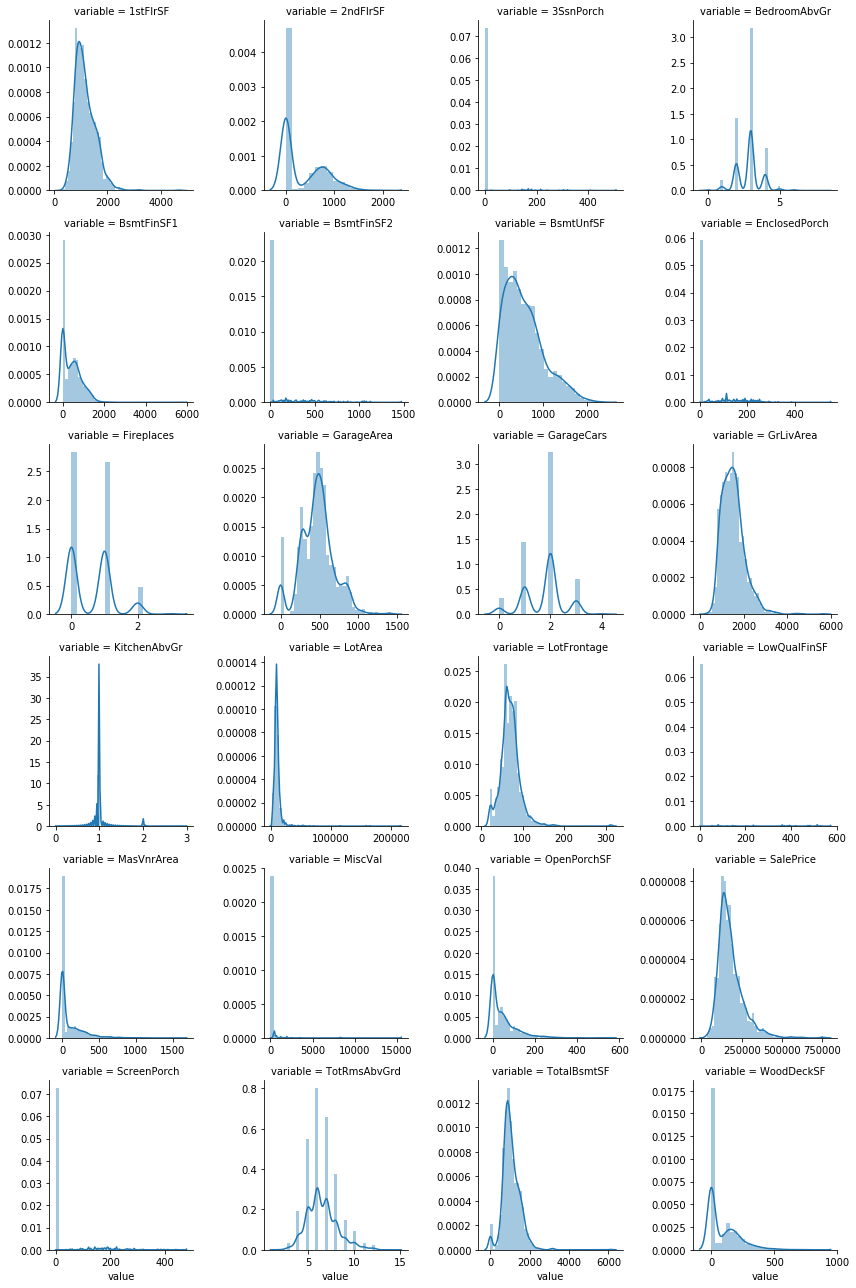

In [84]:
# Distribution Plots for Numerical Features
# Grid of distribution plots of all numerical features
f = pd.melt(numeric_train, value_vars=sorted(numeric_train))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

/Users/drucila/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/drucila/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


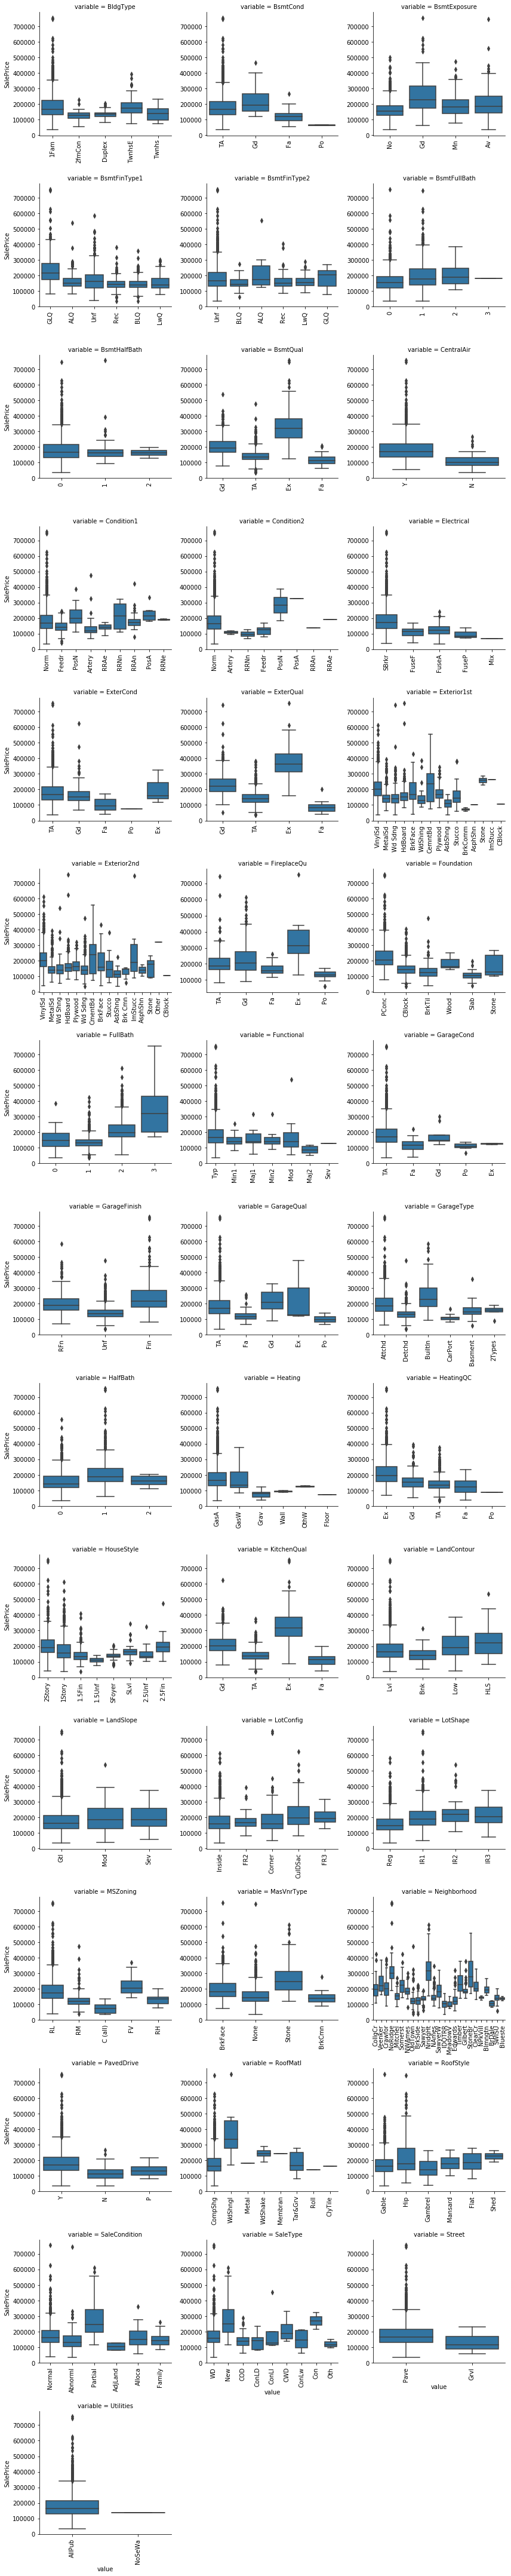

In [79]:
# Box Plot for Categorical Features
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(categorical_train))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/Users/drucila/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


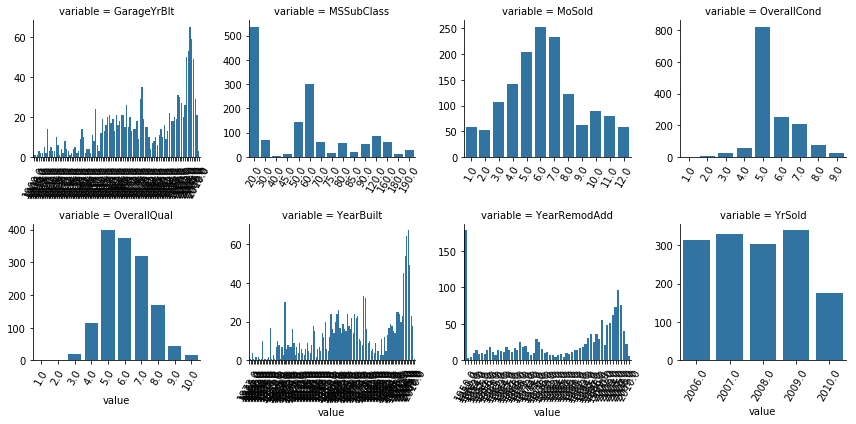

In [89]:
# Graphing Factors
f = pd.melt(train_factors, value_vars=sorted(train_factors))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Oldest house built in 1872. Newest house built in 2010.


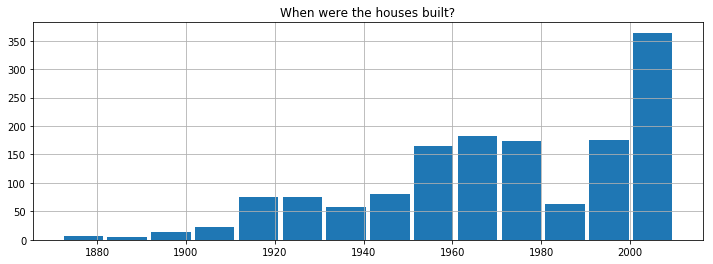

In [70]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()